In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import yfinance as yf
from email.mime.text import MIMEText
import smtplib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel(r"C:\Users\soham\Downloads\ghf.46.xlsx",index_col='Sold dates',parse_dates=['Sold dates'] )
data.head()

,Name,Batch No.,Lic. No,Mfg.date,Exp.date,Price,Category,Therapeutic area (MeSH),Applicants/Holder,Medicine status,Status,Age Group,Stocks sold
Sold dates,,,,,,,,,,,,,
2017-01-01,Diclofenac Sodium & Paracetamol Tablet I.P,DSPDTB-0001,N-MB/2023/251,2024-01-01,2025-12-01,1740.0,Antifungal,Hypertension,Novartis Europharm Limited,Authorised,In Stock,Below 18,233.0
2017-01-02,Cefredrox 200 DT,LPL-33351,L/20/2426/MB,2024-09-01,2025-08-01,165.0,Antibacterial,Bacterial Infections and Mycoses;Aspergillosis...,Pfizer Europe MA EEIG,Authorised,In Stock,Above 18,34.0
2017-01-03,Vertiford -24,VRD403A,L/22/2850/MNB,2024-01-01,2025-12-01,120.0,Antiallergic,Breast Neoplasms,Viatris Limited,Authorised,In Stock,Below 10,424.0
2017-01-04,Leecet,LCA403C,L/22/2852/MNB,2024-03-01,2027-02-01,21.0,Antifungal,Diabetes Mellitus,AstraZeneca AB,Authorised,In Stock,Above 18,53.0
2017-01-05,Lircetam-500,LCM301H,L/22/2850/MNB,2023-06-01,2025-07-01,145.3,Antibacterial,Esophageal Squamous Cell Carcinoma,Boehringer Ingelheim International GmbH,Authorised,Out of Stock,Above 18,236.0


In [3]:
data['Stocks sold'] = data['Stocks sold'].astype(int)
data.head()

,Name,Batch No.,Lic. No,Mfg.date,Exp.date,Price,Category,Therapeutic area (MeSH),Applicants/Holder,Medicine status,Status,Age Group,Stocks sold
Sold dates,,,,,,,,,,,,,
2017-01-01,Diclofenac Sodium & Paracetamol Tablet I.P,DSPDTB-0001,N-MB/2023/251,2024-01-01,2025-12-01,1740.0,Antifungal,Hypertension,Novartis Europharm Limited,Authorised,In Stock,Below 18,233
2017-01-02,Cefredrox 200 DT,LPL-33351,L/20/2426/MB,2024-09-01,2025-08-01,165.0,Antibacterial,Bacterial Infections and Mycoses;Aspergillosis...,Pfizer Europe MA EEIG,Authorised,In Stock,Above 18,34
2017-01-03,Vertiford -24,VRD403A,L/22/2850/MNB,2024-01-01,2025-12-01,120.0,Antiallergic,Breast Neoplasms,Viatris Limited,Authorised,In Stock,Below 10,424
2017-01-04,Leecet,LCA403C,L/22/2852/MNB,2024-03-01,2027-02-01,21.0,Antifungal,Diabetes Mellitus,AstraZeneca AB,Authorised,In Stock,Above 18,53
2017-01-05,Lircetam-500,LCM301H,L/22/2850/MNB,2023-06-01,2025-07-01,145.3,Antibacterial,Esophageal Squamous Cell Carcinoma,Boehringer Ingelheim International GmbH,Authorised,Out of Stock,Above 18,236


In [4]:
data.describe()

,Mfg.date,Exp.date,Price,Stocks sold
count,2587,2587,2587.000000,2587.000000
mean,2023-12-21 00:54:32.980286208,2025-12-08 13:42:08.488596736,420.157661,276.131813
min,2022-08-01 00:00:00,2025-02-01 00:00:00,1.680000,1.000000
25%,2023-11-01 00:00:00,2025-10-01 00:00:00,49.115000,44.000000
50%,2024-01-01 00:00:00,2025-12-01 00:00:00,83.350000,72.000000
75%,2024-03-01 00:00:00,2026-02-01 00:00:00,158.125000,128.000000
max,2024-09-01 00:00:00,2027-02-01 00:00:00,117625.000000,59990.000000
std,NaN,NaN,3558.475577,1967.097479


In [5]:
ts=data["Stocks sold"].resample('M').sum()

In [30]:
ts.head()

Sold dates
2017-01-31    21516
2017-02-28    64443
2017-03-31    22803
2017-04-30     3944
2017-05-31     4490
Freq: M, Name: Stocks sold, dtype: int32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


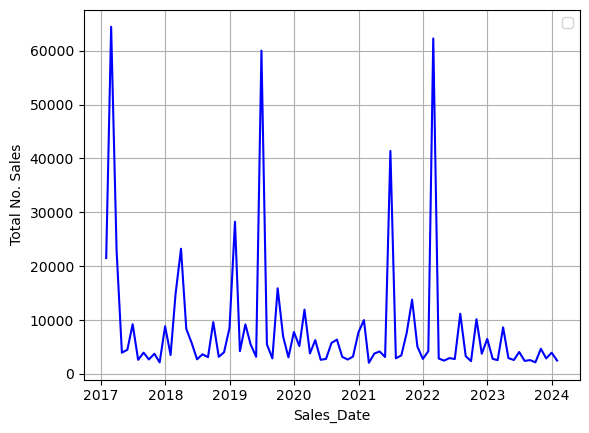

In [50]:
plt.plot(ts,c='b')
plt.grid()
plt.xlabel('Year Wise ')
plt.ylabel('Total No. Sales')
plt.legend()

In [8]:
import statsmodels.api as sm

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adftest=adfuller(ts)

In [11]:
print('pvalue of adfuller test is : ', adftest[1])

pvalue of adfuller test is :  1.832845437384573e-13


In [12]:
len(ts)

85

In [13]:
train =ts[:64]
test =ts[64:]

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model = ARIMA(train, order=(5,0,4))
model_fit = model.fit()
forecast = model_fit.predict(params=model_fit.params)

c:\Users\soham\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
forecast_steps = 64

In [18]:
predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')

In [19]:
len(train),(len(ts)-1)

(64, 84)

In [20]:
predictions.head()

2022-05-31    10096.861679
2022-06-30    10000.104537
2022-07-31    18258.191419
2022-08-31     5332.154392
2022-09-30     2282.875893
Freq: M, Name: predicted_mean, dtype: float64

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
predictions = predictions[:len(test)]


In [23]:
error = np.sqrt(mean_squared_error(test,predictions))
error

7051.491702731122

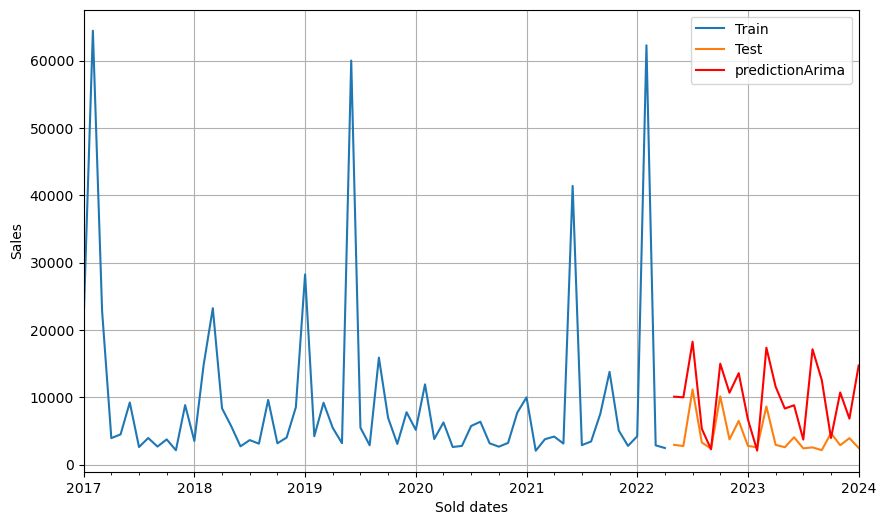

In [24]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
predictions.plot(legend=True,label='predictionArima',c='r')
plt.grid()
plt.ylabel('Sales')
plt.show()

In [25]:
final_model = ARIMA(ts,order=(5,0,4)).fit()

In [26]:
predictions = final_model.predict(len(ts),len(ts)+6)

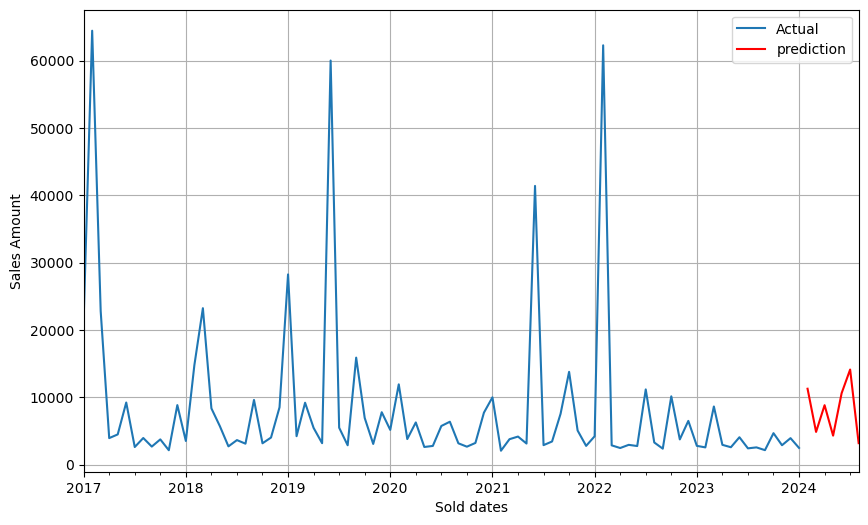

In [27]:
ts.plot(legend=True,label='Actual',figsize=(10,6))
predictions.plot(legend=True,label='prediction',c='r')
plt.ylabel('Sales Amount')
plt.grid()

In [28]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Stocks sold   No. Observations:                   64
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -695.171
Date:                Mon, 16 Sep 2024   AIC                           1412.342
Time:                        10:21:46   BIC                           1436.090
Sample:                    01-31-2017   HQIC                          1421.698
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9791.6717   4286.411      2.284      0.022    1390.461    1.82e+04
ar.L1         -0.8744      0.291     -3.000      0.003      -1.446      -0.303
ar.L2         -1.1596      0.350     -3.316      0.0